In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [135]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [136]:
print(f"la nombre de passagers de titanic est : {titanic.shape[0]}\nle nombre de leurs donnèes : {titanic.shape[1]}")

la nombre de passagers de titanic est : 714
le nombre de leurs donnèes : 4


In [137]:
# remplacer "male" et "female" par 0 et 1 respectivement
data["sex"].replace(["male", "female"], [0, 1], inplace = True)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [138]:
titanic = data[["survived", "pclass", "sex", "age"]]
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [139]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [140]:
titanic.describe()

,survived,pclass,sex,age
count,891.000000,891.000000,891.000000,714.000000
mean,0.383838,2.308642,0.352413,29.699118
std,0.486592,0.836071,0.477990,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,20.125000
50%,0.000000,3.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [141]:
# on remarque qu'ils y'a des donnèes qui sont perdu pandant l'importation des donnèes, donc il faut supprimer les donnèes manquants

In [142]:
titanic = titanic.dropna( axis = 0)
titanic

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
885,0,3,1,39.0
886,0,2,0,27.0
887,1,1,1,19.0
889,1,1,0,26.0


In [143]:
print(f"donc nombre de passagers apres la modefication est : {titanic.shape[0]}\nnombre de champs : {titanic.shape[1]}")

donc nombre de passagers apres la modefication est : 714
nombre de champs : 4


In [144]:
titanic.describe()

,survived,pclass,sex,age
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [145]:
# nombre de passagers dans les 3 differents classes

In [146]:
titanic["pclass"].value_counts()

pclass
3    355
1    186
2    173
Name: count, dtype: int64

In [147]:
# les moyennes d'age, des survivants et pclass entre les passagers femmes et hommes :
titanic.groupby(["sex"]).mean()

,survived,pclass,age
sex,,,
0,0.205298,2.335541,30.726645
1,0.754789,2.065134,27.915709


In [148]:
# on ramarque que :
# les femmes sont beaucoup plus dans les  premiers classes par rapport aux hommes 
# les femmes survivantes sont plus de 75% de leurs totalitès, et les hommes seulement 20% de leurs totalitès
# l'age moyenne des femmes est 27.91 ans et hommes est 30.72 ans

In [149]:
# finding the number of people who survived and not survived
titanic["survived"].value_counts()

survived
0    424
1    290
Name: count, dtype: int64

### data visualization

In [150]:
sns.set()

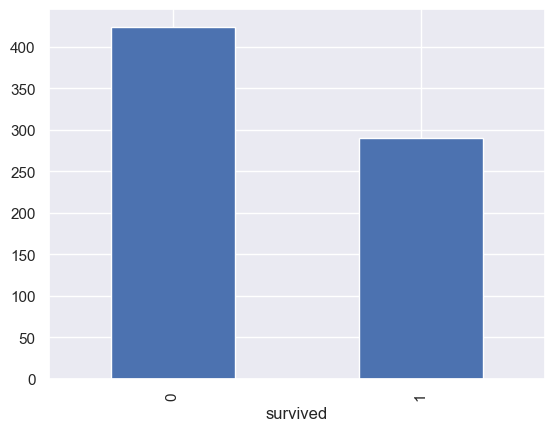

In [151]:
# making a count plot for "survived" column
titanic["survived"].value_counts().plot.bar()
plt.show()

<Axes: xlabel='sex', ylabel='count'>

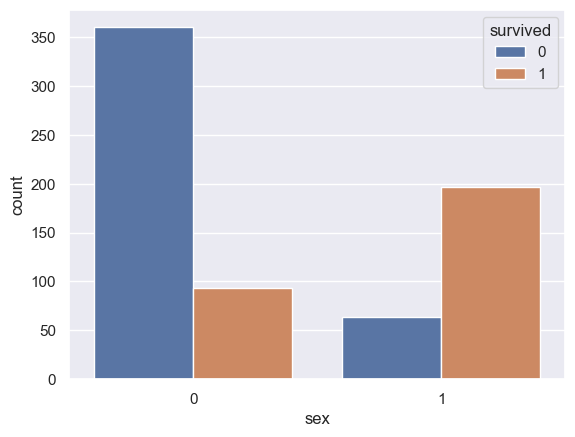

In [152]:
# a plot that show how many people from the two sex have survived
sns.countplot(data = titanic, x= "sex", hue= "survived")

<Axes: xlabel='pclass', ylabel='count'>

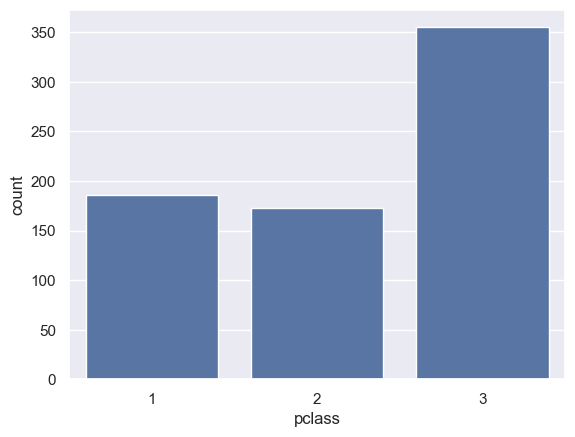

In [153]:
# making a count plot for "pclass" column
sns.countplot(data= titanic, x= "pclass")

<Axes: xlabel='pclass', ylabel='count'>

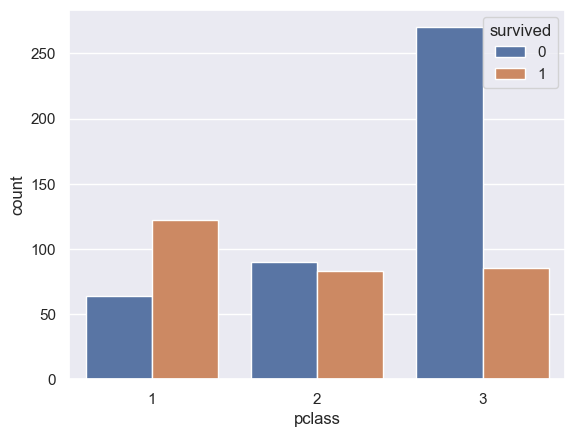

In [154]:
# plot that show how many people from the different class have survived or not
sns.countplot(data= titanic, x= "pclass", hue= "survived")

<Axes: xlabel='pclass', ylabel='age'>

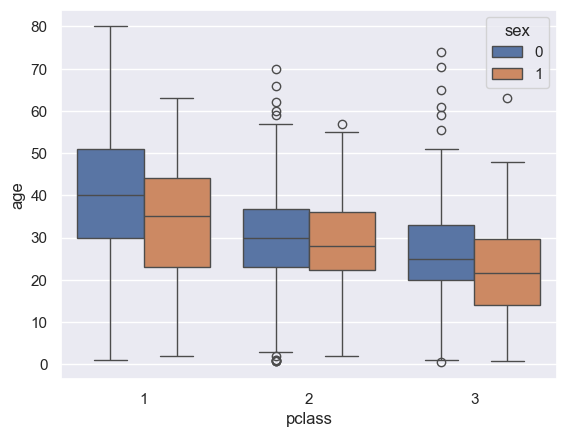

In [155]:
# nomber of people from the two sex in the different class
sns.boxplot(x = "pclass", y= "age", data = titanic, hue= "sex")

### encoding the categorical column

In [156]:
titanic["sex"].value_counts()

sex
0    453
1    261
Name: count, dtype: int64

In [157]:
x= titanic[["sex", "age", "pclass"]]
y= titanic["survived"]

In [158]:
x.head()

,sex,age,pclass
0,0,22.0,3
1,1,38.0,1
2,1,26.0,3
3,1,35.0,1
4,0,35.0,3


In [159]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

### splitting the data into training and test data

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 3)

In [161]:
print(x.shape, x_train.shape, x_test.shape)

(714, 3) (499, 3) (215, 3)


In [162]:
print(y.shape, y_train.shape, y_test.shape)

(714,) (499,) (215,)


### model training

In [163]:
model = LogisticRegression()

In [164]:
# training the logistic regression model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [165]:
x_train_prediction = model.predict(x_train)

In [166]:
# accuracy on training data
x_train_prediction

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [167]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print(f"accuracy score of training data is {training_data_accuracy}")

accuracy score of training data is 0.7875751503006012


In [168]:
# accuracy on training data
x_test_prediction = model.predict(x_test)

In [169]:
x_test_prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [170]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print(f"accuracy score of test data is {test_data_accuracy}")

accuracy score of test data is 0.7953488372093023


In [175]:
# testing the model with new data
# giving pclass = 3, sex = 0, age = 21 for exemple
def survive(model, pclass= 3, sex= 0, age= 21) :
    x= np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    # calculate the probability of surviving or not 
    print(model.predict_proba(x))

In [176]:
# here you give your informations and the model will predict if you'll survive or not
survive(model)

[0]
[[9.99999735e-01 2.65364973e-07]]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
